In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install seaborn
%pip install matplotlib
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from itertools import count

In [6]:
df = pd.read_csv("C:/Users/Atharva Ketkar/Downloads/ML-For-Beginners-main/Python_projects/customer segmentation/Mall_Customers.csv")

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Univariate Analysis

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


C:\Users\Atharva Ketkar\AppData\Local\Temp\ipykernel_14352\1994242243.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'])


<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Density'>

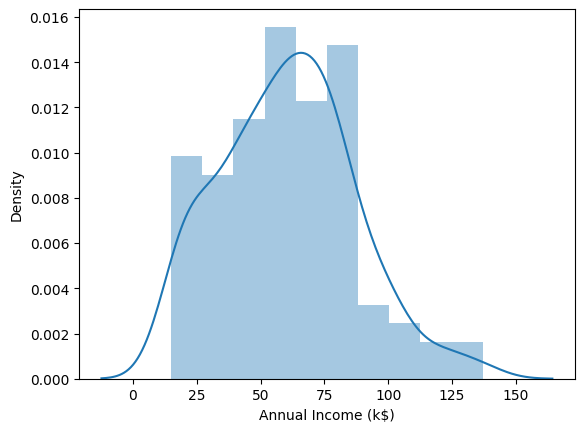

In [9]:
sns.distplot(df['Annual Income (k$)'])

In [10]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

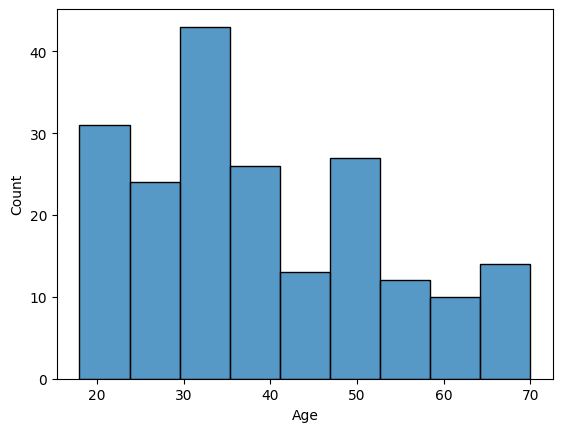

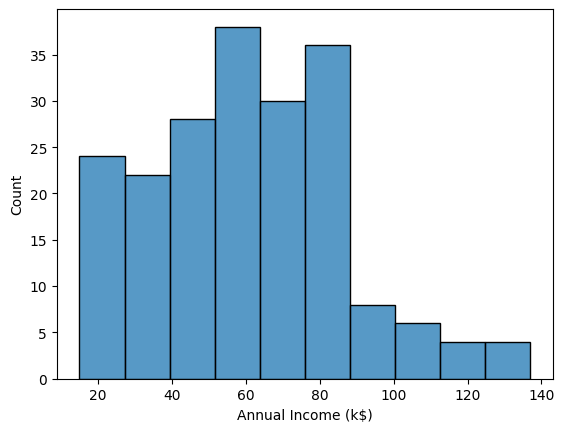

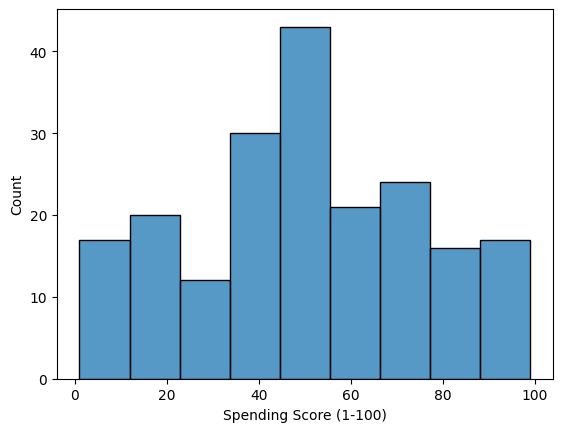

In [11]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for col in columns:
    plt.figure()
    sns.histplot(df[col])

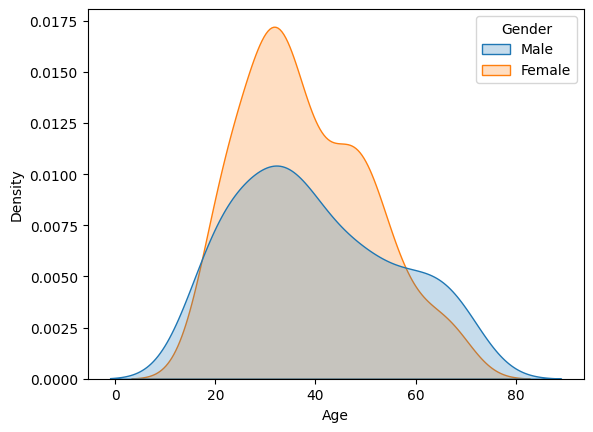

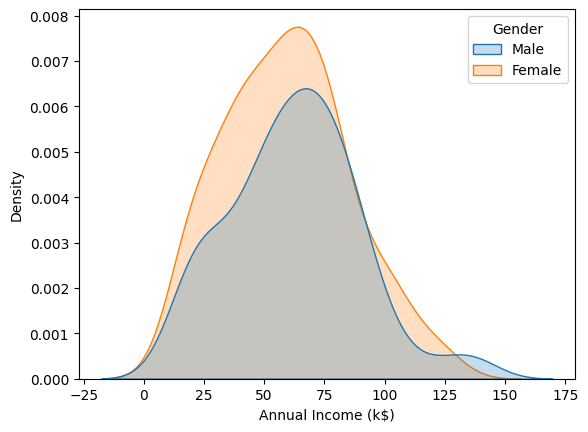

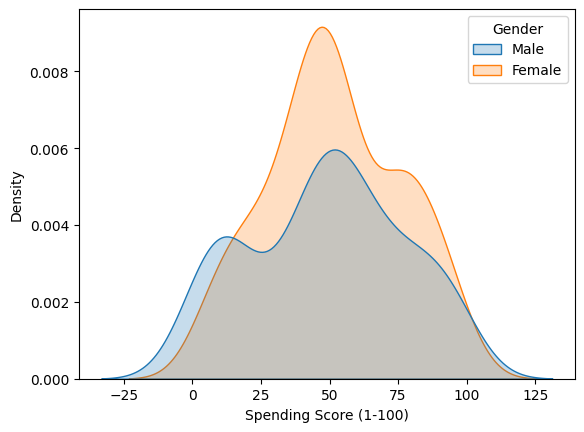

In [12]:
from sklearn.neighbors import KernelDensity


for column in columns:
    plt.figure()
    sns.kdeplot(data= df, x= column, fill = True, hue = 'Gender')

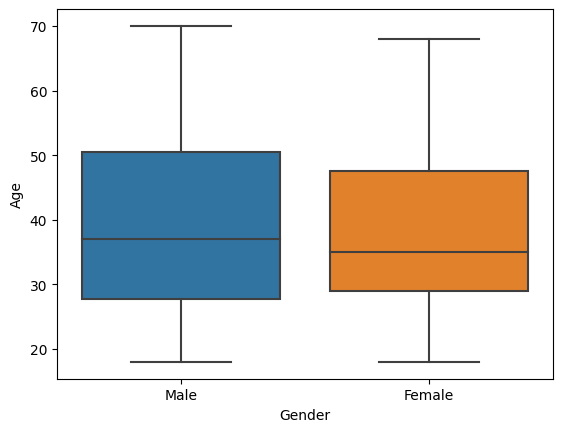

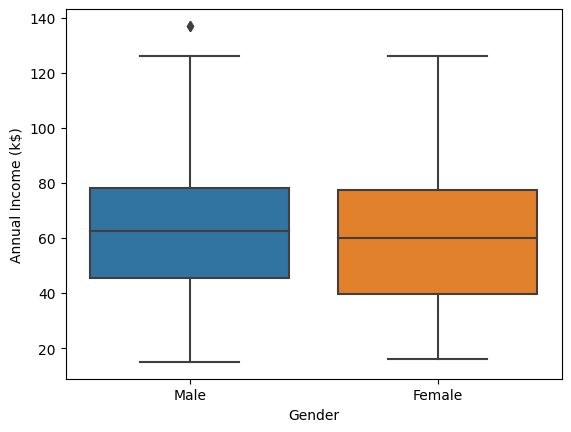

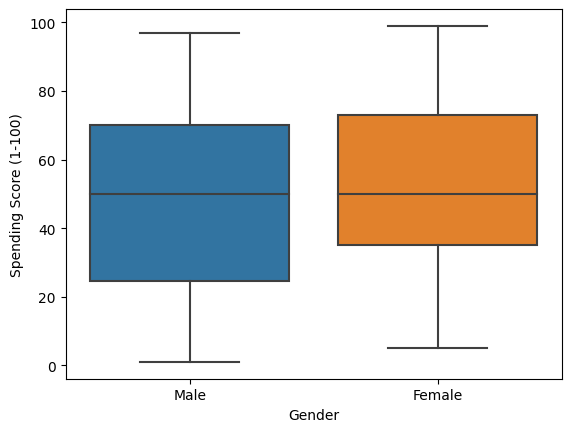

In [13]:
for column in columns:
    plt.figure()
    sns.boxplot(data= df, x= 'Gender', y = column)

In [14]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

Bivariate Analysis

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

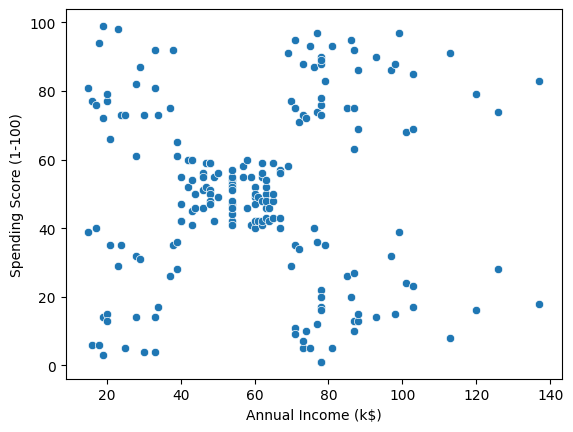

In [15]:
sns.scatterplot(data= df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)')

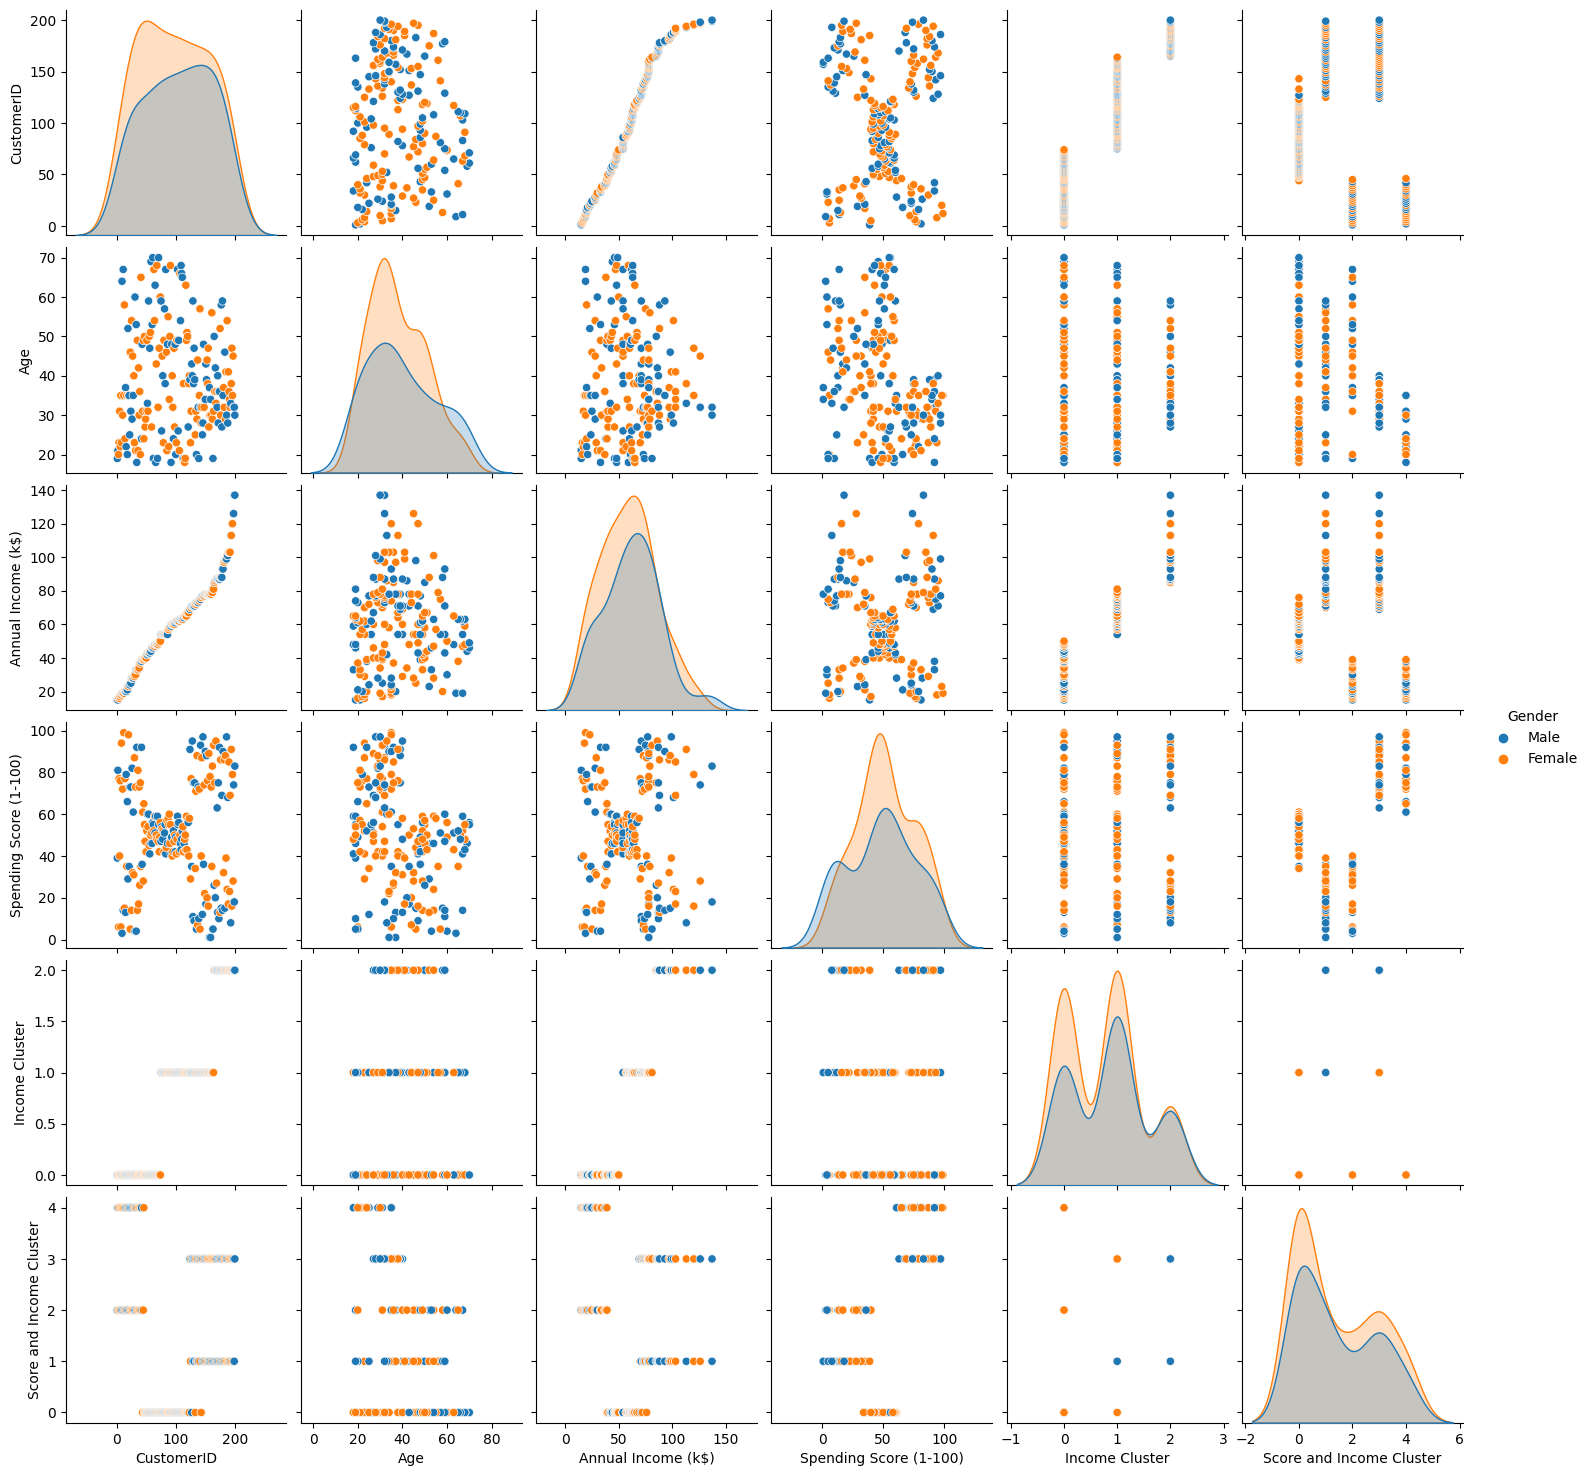

In [72]:
#df = df.drop('CustomerID', axis = 1)
sns.pairplot(data= df, hue= 'Gender')
plt.savefig('Pairplot.png')

In [17]:
df.groupby(by = ['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [18]:
df.corr()

C:\Users\Atharva Ketkar\AppData\Local\Temp\ipykernel_14352\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


C:\Users\Atharva Ketkar\AppData\Local\Temp\ipykernel_14352\1290555927.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True )


<AxesSubplot: >

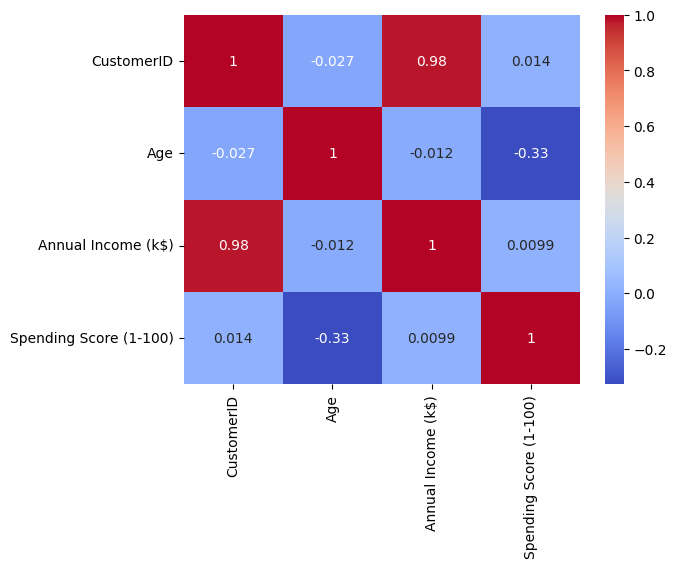

In [19]:
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True )

Clustering

In [20]:
clustering1 = KMeans()

In [22]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans()

In [23]:
clustering1.labels_

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 4])

In [25]:
df['Income Cluster'] = clustering1.labels_
df.head

<bound method NDFrame.head of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Income Cluster  
0                 6  
1            

In [26]:
df['Income Cluster'].value_counts()

0    40
3    36
7    36
1    26
6    24
5    18
2    14
4     6
Name: Income Cluster, dtype: int64

In [27]:
clustering1.inertia_

2862.2504273504273

We use the Elbow method to find optimal #clusters

In [28]:
inertia_score = []
for n in range(1,11):
    kmeans = KMeans(n_clusters= n)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_score.append(kmeans.inertia_)

In [29]:
inertia_score

[137277.27999999997,
 48660.88888888889,
 23528.15217391304,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3972.321428571429,
 2836.339987789988,
 2185.5904761904762,
 1736.565651015651]

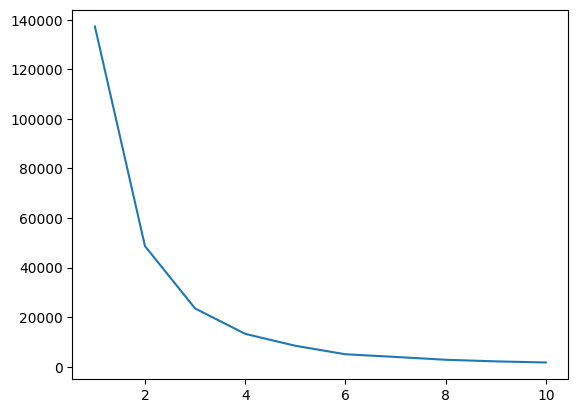

In [30]:
plt.plot(range(1, 11), inertia_score)

In [33]:
clustering1 = KMeans(n_clusters= 3)
clustering1.fit(df[['Annual Income (k$)']])
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [34]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [35]:
df['Income Cluster'].value_counts()

1    90
0    74
2    36
Name: Income Cluster, dtype: int64

In [36]:
clustering1.inertia_

23517.330930930933

In [37]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [39]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.722222,67.088889,50.000000
2,37.833333,99.888889,50.638889


Bivariate

In [40]:
clustering2 = KMeans()
clustering2.fit(df[['Annual Income (k$)',
       'Spending Score (1-100)']])
clustering2.labels_

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 6, 2, 6, 6,
       3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 7, 6, 6, 6, 6,
       6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 1, 7, 1, 0, 1, 0, 1,
       7, 1, 0, 1, 0, 1, 0, 1, 0, 1, 7, 1, 0, 1, 7, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 7, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4])

In [41]:
df['Score and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Score and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,3


We use the Elbow method to find optimal #clusters

In [44]:
inertia_score2 = []
for n in range(1,11):
    kmeans2 = KMeans(n_clusters= n)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_score2.append(kmeans2.inertia_)
inertia_score2

[269981.28,
 183069.17582751293,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37239.83554245604,
 30273.39431207004,
 25018.576334776335,
 21850.16528258563,
 19770.069502743732]

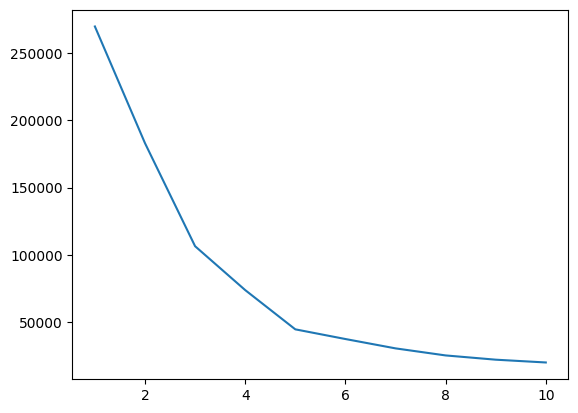

In [45]:
plt.plot(range(1,11), inertia_score2)

In [46]:
clustering2 = KMeans(n_clusters= 5)
clustering2.fit(df[['Annual Income (k$)',
       'Spending Score (1-100)']])
clustering2.labels_

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [47]:
df['Score and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Score and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,2


In [51]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']
centers

,x,y
0,55.296296,49.518519
1,88.200000,17.114286
2,26.304348,20.913043
3,86.538462,82.128205
4,25.727273,79.363636


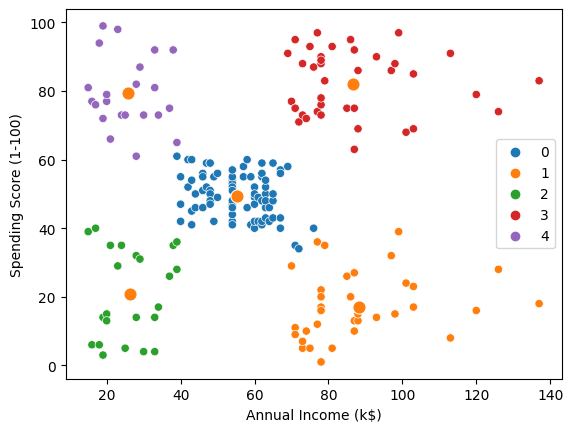

In [71]:
plt.figure()
sns.scatterplot(data= df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue= 'Score and Income Cluster', palette='tab10')
sns.scatterplot(data = centers, x = 'x', y = 'y', s= 90, markers= '*')
plt.savefig('Clustering_bivariate.png')

In [54]:
pd.crosstab(df['Score and Income Cluster'], df['Gender'], normalize= 'index')

Gender,Female,Male
Score and Income Cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.608696,0.391304
3,0.538462,0.461538
4,0.590909,0.409091


In [56]:
df.groupby(by ='Score and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

C:\Users\Atharva Ketkar\AppData\Local\Temp\ipykernel_14352\2184987745.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by ='Score and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Score and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,45.217391,26.304348,20.913043
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636


Multivariate Cluster

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scale = StandardScaler()

In [60]:
dff = pd.get_dummies(df, drop_first= True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Score and Income Cluster,Gender_Male
0,1,19,15,39,0,2,1
1,2,21,15,81,0,4,1
2,3,20,16,6,0,2,0
3,4,23,16,77,0,4,0
4,5,31,17,40,0,2,0


In [62]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Score and Income Cluster', 'Gender_Male'],
      dtype='object')

In [64]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [66]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [67]:
inertia_score3 = []
for n in range(1,11):
    kmeans3 = KMeans(n_clusters= n)
    kmeans3.fit(dff)
    inertia_score3.append(kmeans3.inertia_)
inertia_score3

[800.0000000000002,
 588.8026767824937,
 484.23053399217144,
 386.71478577406884,
 325.6827904073893,
 275.04999356235834,
 239.856961755028,
 200.3258622031658,
 174.1880002218681,
 152.08676298710697]

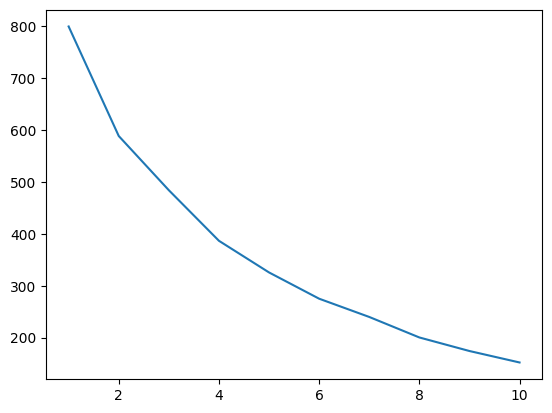

In [68]:
plt.plot(range(1,11), inertia_score3)

In [69]:
clustering3 = KMeans(n_clusters= 4)
clustering3.fit(dff)
dff['Clusters'] = clustering3.labels_
dff.head()

,0,1,2,3,Clusters
0,-1.424569,-1.738999,-0.434801,1.128152,0
1,-1.281035,-1.738999,1.195704,1.128152,0
2,-1.352802,-1.700830,-1.715913,-0.886405,2
3,-1.137502,-1.700830,1.040418,-0.886405,3
4,-0.563369,-1.662660,-0.395980,-0.886405,3


In [70]:
df.to_csv('Clustering_multiVariate.csv')